In [27]:
#This notebook is for conducting PCA of Marinobacter pangenome gene frequencies
#Data is the gene frequency output produced from Anvi'o's pan functional enrichment analysis.

#packages required for this analysis
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
#for saving svg text
new_rc_params = {'text.usetex': False,
"svg.fonttype": 'none'}
mpl.rcParams.update(new_rc_params)

In [28]:
#Gene frequency file from anvio
mbpan_gene_freq_file = "mbpan-functions-occurrence-frequency.txt"

#metadata to add for plotting
deets = 'mb-clades-env-py.txt'

#Create the dataframe of gene frequencies
df1 = pd.read_csv(mbpan_gene_freq_file, sep='\t', header=None)
df2 = df1.T #transpose the data for use with sklearn

#Make the functions the column headers and drop column indices
df2.columns = df2.iloc[0]
df2 = df2.drop(df2.index[0])

#create a df of numbers to transform and save the corresponding genome names
df3 = df2.drop(['Genome'],axis=1) #matrix of frequencies only (no strings for PCA)
df4 = df2[['Genome']] #saving identifying info for each row for later
#fix the names of the cryopeg MAGs; these were operational names used during binning refinement
meta_names = {'Marinobacter_CB1':'CB1', 'Marinobacter_CBIA':'CBIA', 
              'Marinobacter_CBIW17':'CBIW17','Marinobacter_CBIW18':'CBIW18'} #dictionary correcting to sample name only
df4 = df4.replace(meta_names) #correct the meta_names

In [29]:
#Apply scaling to df3 to transform data appropriately for PCA
x = StandardScaler().fit_transform(df3)
#set up the PCA
pca = PCA(n_components=2)
#run the PCA on the transformed data
principalComponents = pca.fit_transform(x)
#make a dataframe with the results for plotting
principalDf = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2'])
#fix an indexing error so the genome names line up with their values
principalDf.index += 1
#add the genome names back to the pca df
df5 = pd.concat([principalDf, df4], axis=1)
#add in the clade details
df6 = pd.read_csv(deets, sep='\t', header=0)
df6 = df6.replace(meta_names)
df7 = df5.merge(df6,on='Genome')
#get the variance ratio numbers for the axes
pc1_var, pc2_var = pca.explained_variance_ratio_

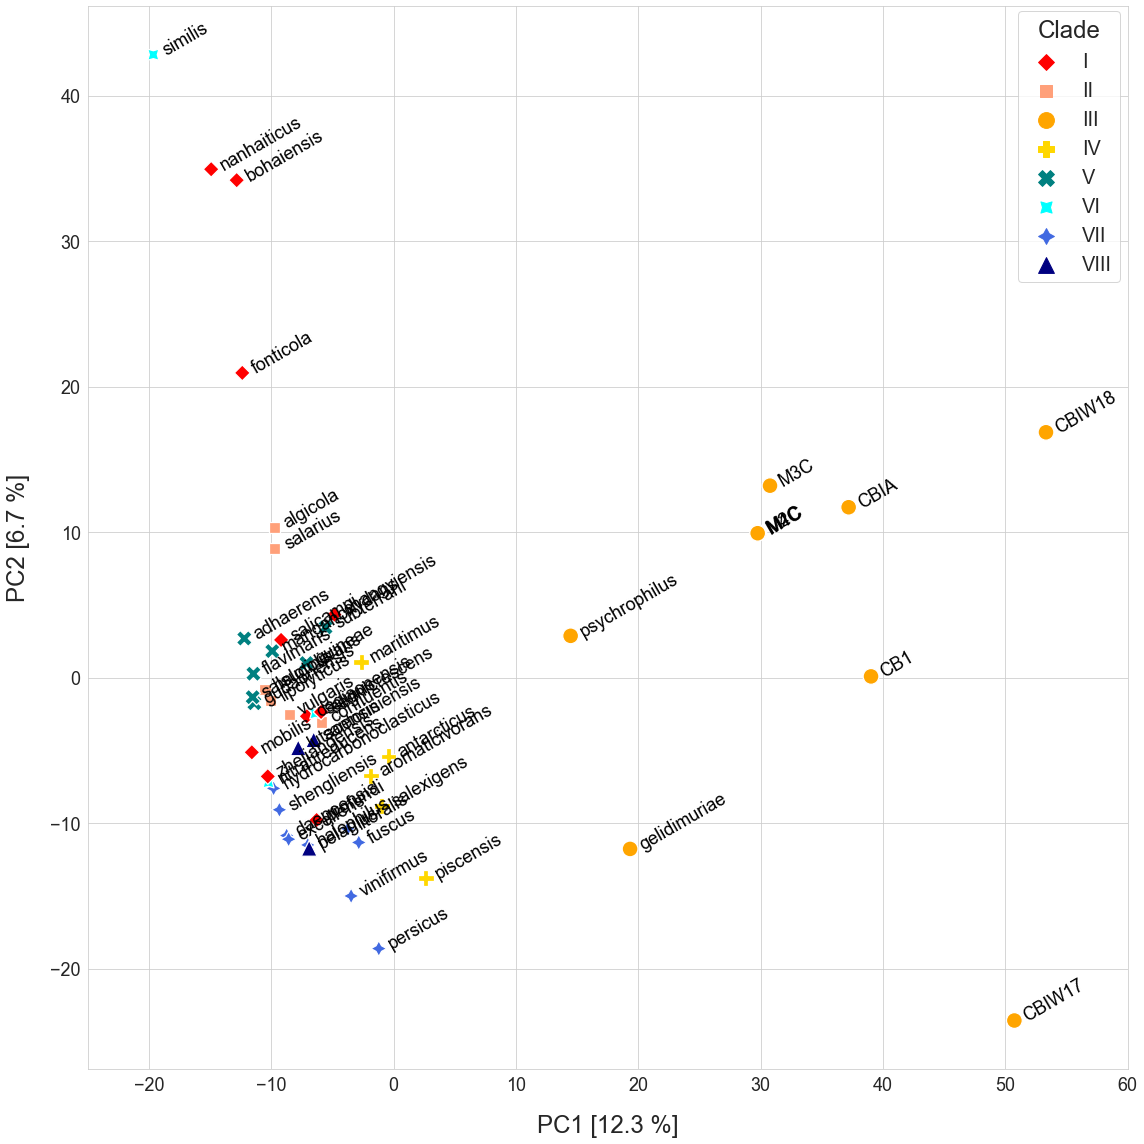

In [53]:
#ordered clades for legend
clades = ['I','II','III','IV','V','VI','VII','VIII']
#color pallette for the clades, consistent with other figures
clade_pal = {'I':'red','II':'lightsalmon','III':'orange','IV':'gold',
             'V':'teal','VI':'cyan','VII':'royalblue','VIII':'navy'}

#setting up plot
sns.set_style('whitegrid') #plot theme
fig,ax=plt.subplots(figsize=(16,16)) #setting size of figure
ax.tick_params(labelsize=18) #setting tick label size
#create seaborn scatterplot object
pca_plot = sns.scatterplot(x='pc1',y='pc2',data=df7, #setting axes and data
                           hue='Clade', hue_order=clades, style = 'Clade', #getting color and shapes set by clade
                           s=250,palette=clade_pal) #s is dot size, and using custom color pallette
#fixing the size of the markers in the legend box
lgnd = plt.legend(bbox_to_anchor=(0.885,1.005), loc="upper left", #setting legend location
                  fontsize=20, title='Clade', title_fontsize = 24) #fonts and title set
for i in range(8): #looping over legend labels to set the size
    lgnd.legendHandles[i]._sizes = [250]
#labelling axes
plt.xlabel(f'PC1 [{100*pc1_var:.3g} %]',fontsize=24,labelpad = 20) #adding pc1 variability data to x-axis
plt.ylabel(f'PC2 [{100*pc2_var:.2g} %]',fontsize=24,labelpad = 20) #adding pc2 variability data to y-axis
plt.xlim(-25,60)

#adding labels for each genome to each point
for line in range(0,df7.shape[0]): #I remove labels manually except for Clade III using Inkscape
     pca_plot.text(df7.pc1[line]+0.5, df7.pc2[line], #setting location for text box for each dot in the plot
     df7.Genome[line], horizontalalignment='left', rotation=30, #getting Genome name for each dot and filling text box; also setting relative position and rotation of text
     size=18, color='black', weight='light') #setting text size and color

plt.tight_layout() #display the plot

#save it if you'd like by commenting show and uncommenting savefig
plt.show()
#plt.savefig('fig_editing/mbpan_gene_freq_pca_v3.svg',dpi=300,format='svg')

In [20]:
#original data matrix input for the PCA
df2

,Genome,"Cold shock protein, CspA family","Uncharacterized conserved protein, implicated in type VI secretion and phage assembly",Acyl-CoA dehydrogenase related to the alkylation response protein AidB,"Translation elongation factor EF-Tu, a GTPase","Na+-dependent transporter, SNF family","ABC-type polar amino acid transport system, ATPase component",Copper chaperone CopZ,"TRAP-type mannitol/chloroaromatic compound transport system, periplasmic component",CMP-2-keto-3-deoxyoctulosonic acid synthetase,...,Fatty acid repression mutant protein (predicted oxidoreductase),"Archaeal ribulose 1,5-bisphosphate synthetase/yeast thiazole synthase",DNA topoisomerase IB,Murein endopeptidase,Predicted esterase of the alpha/beta hydrolase fold,"Glycerol dehydrogenase or related enzyme, iron-containing ADH family","Type V secretory pathway, adhesin AidA",HKD family nuclease,Ribose 5-phosphate isomerase RpiB,"Predicted O-linked N-acetylglucosamine transferase, SPINDLY family"
1,M1C,7,5,24,2,5,5,3,7,2,...,0,0,0,0,0,0,0,0,0,0
2,M2C,7,5,24,2,5,5,3,7,2,...,0,0,0,0,0,0,0,0,0,0
3,M3C,6,5,24,2,6,4,4,7,2,...,0,0,0,0,0,0,0,0,0,0
4,M4C,7,5,24,2,5,5,3,7,2,...,0,0,0,0,0,0,0,0,0,0
5,Marinobacter_CB1,5,9,25,2,5,3,4,4,2,...,0,0,0,0,0,0,0,0,0,0
6,Marinobacter_CBIA,7,5,18,2,6,3,4,7,2,...,0,0,0,0,0,0,0,0,0,0
7,Marinobacter_CBIW17,5,7,17,2,3,1,3,6,3,...,0,0,0,0,0,0,0,0,0,0
8,Marinobacter_CBIW18,7,5,25,2,5,2,5,8,2,...,0,0,0,0,0,0,0,0,0,0
9,adhaerens,6,2,24,2,5,4,4,4,2,...,0,0,0,0,0,0,0,0,0,0
10,algicola,5,3,25,2,5,5,6,8,2,...,0,0,0,0,0,1,0,0,0,0
